In [54]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

Archivo hechos. Transformación a DF

In [55]:
df = pd.read_excel(r"homicidios.xlsx", sheet_name= "HECHOS")


In [56]:
df.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


Cambiar a minúsculas el txt

In [57]:

df_h = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

Cambiar a minúsculas nombres de las columnas

In [58]:
df_h.columns = df.columns.str.lower()

In [59]:
df_h.head(2)

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,altura,cruce,dirección normalizada,comuna,xy (caba),pos x,pos y,participantes,victima,acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,av piedra buena y av fernandez de la cruz,avenida,...,NaN,"fernandez de la cruz, f., gral. av.","piedra buena av. y fernandez de la cruz, f., g...",8,point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,moto-auto,moto,auto
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,av gral paz y av de los corrales,gral paz,...,NaN,de los corrales av.,"paz, gral. av. y de los corrales av.",9,point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,auto-pasajeros,auto,pasajeros


Verificación de presencia de duplicados en la columna "id"

In [60]:
duplicados = df_h["id"].duplicated().sum()

In [61]:
duplicados

0

Visualización tipo de datos y presencia de nulos por columa

In [62]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     696 non-null    object        
 1   n_victimas             696 non-null    int64         
 2   fecha                  696 non-null    datetime64[ns]
 3   aaaa                   696 non-null    int64         
 4   mm                     696 non-null    int64         
 5   dd                     696 non-null    int64         
 6   hora                   696 non-null    object        
 7   hh                     696 non-null    object        
 8   lugar_del_hecho        696 non-null    object        
 9   tipo_de_calle          696 non-null    object        
 10  calle                  695 non-null    object        
 11  altura                 129 non-null    float64       
 12  cruce                  525 non-null    object        
 13  direc

Visualización y suma de valores nulos por columna

In [63]:
df_h.isnull().sum()


id                         0
n_victimas                 0
fecha                      0
aaaa                       0
mm                         0
dd                         0
hora                       0
hh                         0
lugar_del_hecho            0
tipo_de_calle              0
calle                      1
altura                   567
cruce                    171
dirección normalizada      8
comuna                     0
xy (caba)                  0
pos x                      0
pos y                      0
participantes              0
victima                    0
acusado                    0
dtype: int64

Reemplazar valores nulos en la columna 'altura' y "calle" por 'sin dato'

In [64]:

df_h['calle'].fillna('sin dato', inplace=True)
df_h['altura'].fillna('sin dato', inplace=True)

In [65]:
df_h.sample()

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,altura,cruce,dirección normalizada,comuna,xy (caba),pos x,pos y,participantes,victima,acusado
518,2019-0103,1,2019-12-18,2019,12,18,sd,sd,"paz, gral. av. y griveo",gral paz,...,sin dato,griveo,"paz, gral. av. y griveo",11,point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,moto-moto,moto,moto


Transformación del tipo de dato de la cokumna "comuna" de int a str

In [66]:
df_h['comuna'] = df_h['comuna'].astype(str)

Verificación de columnas

In [67]:
df_h.columns

Index(['id', 'n_victimas', 'fecha', 'aaaa', 'mm', 'dd', 'hora', 'hh',
       'lugar_del_hecho', 'tipo_de_calle', 'calle', 'altura', 'cruce',
       'dirección normalizada', 'comuna', 'xy (caba)', 'pos x', 'pos y',
       'participantes', 'victima', 'acusado'],
      dtype='object')

Selección de columnas y creacion de df_hechos

In [68]:
df_hechos = df_h [['id', 'n_victimas', 'hora', 
       'lugar_del_hecho', 'calle', 'altura',
        'comuna', 'tipo_de_calle', 
       'participantes', 'victima', 'acusado']]

In [69]:
df_hechos.head(2)

,id,n_victimas,hora,lugar_del_hecho,calle,altura,comuna,tipo_de_calle,participantes,victima,acusado
0,2016-0001,1,04:00:00,av piedra buena y av fernandez de la cruz,piedra buena av.,sin dato,8,avenida,moto-auto,moto,auto
1,2016-0002,1,01:15:00,av gral paz y av de los corrales,"paz, gral. av.",sin dato,9,gral paz,auto-pasajeros,auto,pasajeros


In [70]:
valores_unicos = df_hechos.apply(lambda x: x.unique())
print(valores_unicos)

id                 [2016-0001, 2016-0002, 2016-0003, 2016-0004, 2...
n_victimas                                                 [1, 2, 3]
hora               [04:00:00, 01:15:00, 07:00:00, 00:00:00, 05:20...
lugar_del_hecho    [av piedra buena y av fernandez de la cruz, av...
calle              [piedra buena av., paz, gral. av., entre rios ...
altura             [sin dato, 2034.0, 1366.0, 156.0, 1483.0, 30.0...
comuna             [8, 9, 1, 11, 15, 4, 7, 12, 3, 13, 14, 10, 6, ...
tipo_de_calle                  [avenida, gral paz, calle, autopista]
participantes      [moto-auto, auto-pasajeros, moto-sd, moto-pasa...
victima            [moto, auto, peaton, sd, cargas, bicicleta, pa...
acusado            [auto, pasajeros, sd, objeto fijo, cargas, mot...
dtype: object


Filtrar y seleccionar desde la columna "aaaa" años 2020 y 2021

In [71]:
#df_hechos = df_hechos[(df_hechos['aaaa'] == 2020) | (df_hechos['aaaa'] == 2021)]
#df_hechos.head(2)

Archivo víctimas. Transformación a DF

In [72]:
df_victimas = pd.read_excel(r"homicidios.xlsx", sheet_name= "VICTIMAS")

In [73]:
df_victimas.sample(2)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
245,2017-0114,2017-09-15,2017,9,15,CONDUCTOR,AUTO,MASCULINO,26,2017-09-15 00:00:00
119,2016-0148,2016-11-16,2016,11,16,CONDUCTOR,MOTO,MASCULINO,SD,SD


Cambiar a minúscula todo el DF

In [74]:
df_victimas= df_victimas.applymap(lambda x: x.lower() if isinstance(x, str) else x)

Cambiar a minúscula los títulos de las columnas

In [75]:
df_victimas.columns = df_victimas.columns.str.lower()

In [76]:
df_victimas.sample(2)

,id_hecho,fecha,aaaa,mm,dd,rol,victima,sexo,edad,fecha_fallecimiento
69,2016-0092,2016-07-15,2016,7,15,conductor,moto,masculino,24,2016-07-15 00:00:00
412,2018-0122,2018-11-12,2018,11,12,conductor,auto,masculino,33,2018-11-12 00:00:00


Encontrar valores duplicados en columna "id_hecho"

In [77]:
duplicados = df_victimas["id_hecho"].duplicated().sum()
print("Cantidad de duplicados en 'id_hecho':", duplicados)

Cantidad de duplicados en 'id_hecho': 21


Encontrar valores nulos

In [78]:
df_victimas.isnull().sum()

id_hecho               0
fecha                  0
aaaa                   0
mm                     0
dd                     0
rol                    0
victima                0
sexo                   0
edad                   0
fecha_fallecimiento    0
dtype: int64

Verificación tipo de dato por columna

In [79]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_hecho             717 non-null    object        
 1   fecha                717 non-null    datetime64[ns]
 2   aaaa                 717 non-null    int64         
 3   mm                   717 non-null    int64         
 4   dd                   717 non-null    int64         
 5   rol                  717 non-null    object        
 6   victima              717 non-null    object        
 7   sexo                 717 non-null    object        
 8   edad                 717 non-null    object        
 9   fecha_fallecimiento  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


Verificar cantidad de valores únicos en la columna "edad"

In [80]:
valores_no_validos = df_victimas["edad"].unique()
valores_no_validos

array([19, 70, 30, 18, 29, 22, 16, 59, 65, 34, 41, 50, 38, 21, 52, 36, 20,
       54, 'sd', 56, 24, 78, 79, 26, 57, 37, 58, 23, 60, 42, 53, 51, 40,
       87, 76, 75, 35, 80, 43, 45, 67, 27, 55, 49, 81, 25, 33, 46, 83, 39,
       28, 7, 48, 4, 82, 32, 17, 47, 61, 10, 95, 73, 84, 66, 85, 1, 15,
       13, 77, 44, 31, 62, 74, 71, 11, 86, 69, 72, 12, 63, 92, 68, 91, 64,
       5, 88], dtype=object)

Reemplazar el valor "sd" por 0

In [81]:
df_victimas["edad"] = df_victimas["edad"].replace("sd", 0)

Transformar columna edad a tipo de dato int

In [82]:
df_victimas["edad"] = df_victimas["edad"].astype(int)

 <Ddebido a que los dataFrames tienen la misma estructura y cuentan con datos relacionados y complementarios, se van a unir mediante un join, en un solo DataFrame. Facilitando la gestión de los datos y realizar un mejor análisis en conjunto.

* Selección de columnas para realizar el merge de df_hechos 

In [83]:
columnas = ['id', 'n_victimas', 'lugar_del_hecho', 'comuna', "altura", 'participantes',"calle","acusado", 'tipo_de_calle',"hora" ]
df_hechos_seleccionados = df_hechos[columnas] 

* Unión de ambos df mediante la función merge = join 

In [84]:
df_hechos_victimas = df_hechos_seleccionados.merge(df_victimas, left_on='id', right_on='id_hecho', how='inner')
df_hechos_victimas.head(2)

,id,n_victimas,lugar_del_hecho,comuna,altura,participantes,calle,acusado,tipo_de_calle,hora,id_hecho,fecha,aaaa,mm,dd,rol,victima,sexo,edad,fecha_fallecimiento
0,2016-0001,1,av piedra buena y av fernandez de la cruz,8,sin dato,moto-auto,piedra buena av.,auto,avenida,04:00:00,2016-0001,2016-01-01,2016,1,1,conductor,moto,masculino,19,2016-01-01 00:00:00
1,2016-0002,1,av gral paz y av de los corrales,9,sin dato,auto-pasajeros,"paz, gral. av.",pasajeros,gral paz,01:15:00,2016-0002,2016-01-02,2016,1,2,conductor,auto,masculino,70,2016-01-02 00:00:00


In [85]:
df_hechos_victimas.isnull().sum()

id                     0
n_victimas             0
lugar_del_hecho        0
comuna                 0
altura                 0
participantes          0
calle                  0
acusado                0
tipo_de_calle          0
hora                   0
id_hecho               0
fecha                  0
aaaa                   0
mm                     0
dd                     0
rol                    0
victima                0
sexo                   0
edad                   0
fecha_fallecimiento    0
dtype: int64

* Se convierten todos los valores de la columna "fecha_fallecimiento" a cadenas de texto (str) y luego se aplica str.split() para dividir la fecha y la hora

In [86]:
df_hechos_victimas['fecha_fallecimiento'] = df_hechos_victimas['fecha_fallecimiento'].astype(str)

df_hechos_victimas['fecha_fallecimiento'] = df_hechos_victimas['fecha_fallecimiento'].str.split(' ').str[0]
df_hechos_victimas.head(2)

,id,n_victimas,lugar_del_hecho,comuna,altura,participantes,calle,acusado,tipo_de_calle,hora,id_hecho,fecha,aaaa,mm,dd,rol,victima,sexo,edad,fecha_fallecimiento
0,2016-0001,1,av piedra buena y av fernandez de la cruz,8,sin dato,moto-auto,piedra buena av.,auto,avenida,04:00:00,2016-0001,2016-01-01,2016,1,1,conductor,moto,masculino,19,2016-01-01
1,2016-0002,1,av gral paz y av de los corrales,9,sin dato,auto-pasajeros,"paz, gral. av.",pasajeros,gral paz,01:15:00,2016-0002,2016-01-02,2016,1,2,conductor,auto,masculino,70,2016-01-02


In [87]:
df_hechos_victimas = df_hechos_victimas[(df_hechos_victimas['aaaa'] == 2020) | (df_hechos_victimas['aaaa'] == 2021)]
df_hechos_victimas

,id,n_victimas,lugar_del_hecho,comuna,altura,participantes,calle,acusado,tipo_de_calle,hora,id_hecho,fecha,aaaa,mm,dd,rol,victima,sexo,edad,fecha_fallecimiento
539,2020-0001,1,uriarte y loyola,15,sin dato,peaton-auto,uriarte,auto,calle,10:40:00,2020-0001,2020-01-04,2020,1,4,peaton,peaton,femenino,87,2020-01-04
540,2020-0002,1,saraza y varela av.,7,sin dato,moto-objeto fijo,saraza,objeto fijo,avenida,20:00:00,2020-0002,2020-01-05,2020,1,5,conductor,moto,masculino,36,2020-01-07
541,2020-0003,1,rivadavia av. y combate de los pozos,3,sin dato,peaton-auto,rivadavia av.,auto,avenida,06:00:00,2020-0003,2020-01-11,2020,1,11,peaton,peaton,masculino,44,2020-01-11
542,2020-0004,1,rodriguez peña y rivadavia av.,1,sin dato,peaton-pasajeros,rodriguez pe?a,pasajeros,avenida,21:40:00,2020-0004,2020-01-14,2020,1,14,peaton,peaton,masculino,82,2020-01-15
543,2020-0005,1,24 de noviembre y san juan av.,3,sin dato,moto-pasajeros,24 de noviembre,pasajeros,avenida,06:00:00,2020-0005,2020-01-14,2020,1,14,conductor,moto,masculino,25,2020-02-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,av. riestra y mom,7,sin dato,moto-auto,riestra av.,auto,avenida,17:10:00,2021-0093,2021-12-13,2021,12,13,pasajero_acompañante,moto,femenino,18,2021-12-18
713,2021-0094,1,au dellepiane y lacarra,9,sin dato,moto-auto,"dellepiane, luis, tte. gral.",auto,autopista,01:10:00,2021-0094,2021-12-20,2021,12,20,pasajero_acompañante,moto,femenino,43,2021-12-20
714,2021-0095,1,av. gaona y terrada,11,sin dato,moto-cargas,gaona av.,cargas,avenida,00:43:00,2021-0095,2021-12-30,2021,12,30,conductor,moto,masculino,27,2022-01-02
715,2021-0096,1,av. eva peron 4071,9,4071.0,auto-cargas,"peron, eva av.",cargas,avenida,10:30:00,2021-0096,2021-12-15,2021,12,15,conductor,auto,masculino,60,2021-12-20


In [88]:
# Ruta donde deseas guardar el archivo CSV
ruta_csv = r"C:\Users\rossa\Desktop\HENRY\PROYECTO INDIVIDUAL PB\df_hechos_victimas.csv" 

# Guarda el DataFrame en un archivo CSV -'index=False' evita que se incluya el índice en el archivo CSV
df_hechos_victimas.to_csv(ruta_csv, index=False)  

print("DataFrame guardado como archivo CSV en:", ruta_csv)

DataFrame guardado como archivo CSV en: C:\Users\rossa\Desktop\HENRY\PROYECTO INDIVIDUAL PB\df_hechos_victimas.csv


In [89]:
# Especifica la ruta completa del archivo CSV
ruta_csv = r"df_hechos_victimas.csv" 

# Carga el archivo CSV en un DataFrame
df_hechos_victimas= pd.read_csv(ruta_csv)

In [90]:
df_hechos_victimas.head(2)

,id,n_victimas,lugar_del_hecho,comuna,altura,participantes,calle,acusado,tipo_de_calle,hora,id_hecho,fecha,aaaa,mm,dd,rol,victima,sexo,edad,fecha_fallecimiento
0,2020-0001,1,uriarte y loyola,15,sin dato,peaton-auto,uriarte,auto,calle,10:40:00,2020-0001,2020-01-04,2020,1,4,peaton,peaton,femenino,87,2020-01-04
1,2020-0002,1,saraza y varela av.,7,sin dato,moto-objeto fijo,saraza,objeto fijo,avenida,20:00:00,2020-0002,2020-01-05,2020,1,5,conductor,moto,masculino,36,2020-01-07


Graficos de métricas

Buscar valores atípicos/extremos u outliers. Asimismo, la utilización de gráficos coherentes según la tipología de variable que corresponda resulta esencial. 

Se disponibiliza el cálculo y visualización de métricas,  realizadas para tener un mejor entendimiento del escenario macro y aquellas particularidades significativas para observar y analizar.

1- calcula el número de muertes en el 2021 por tipo de calle y tipo de víctima. Gráfico de barras.   

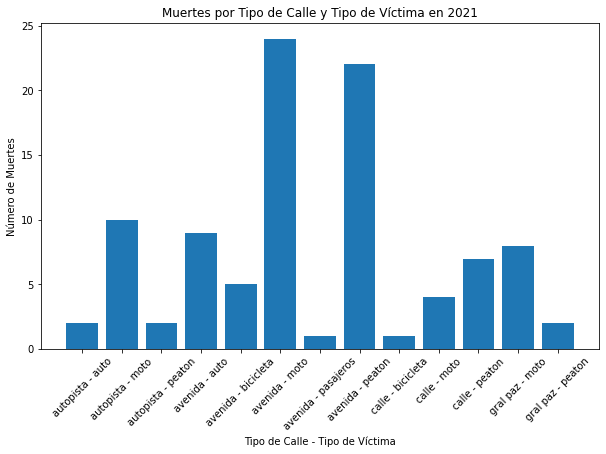

En el año 2021, la mayor cantidad de muertes ocurrió en avenida con víctimas de tipo moto, con un total de 24 muertes.
El porcentaje de muertes en esta combinación fue del 24.74% del total de muertes en 2021.


In [118]:
# Filtrar los datos para incluir solo registros del año 2021
df_2021 = df_hechos_victimas[df_hechos_victimas['aaaa'] == 2021]

# Agrupar por tipo de calle y tipo de víctima, sumando las muertes en cada grupo
muertes_por_tipo = df_2021.groupby(['tipo_de_calle', 'victima'])['n_victimas'].sum().reset_index()

# Calcular el total de muertes en 2021
total_muertes_2021 = muertes_por_tipo['n_victimas'].sum()

# Calcular el porcentaje de muertes para cada combinación
muertes_por_tipo['porcentaje_muertes'] = (muertes_por_tipo['n_victimas'] / total_muertes_2021) * 100

# Encontrar la combinación con el mayor número de muertes y su porcentaje
max_muertes = muertes_por_tipo['n_victimas'].max()
tipo_calle_max_muertes = muertes_por_tipo[muertes_por_tipo['n_victimas'] == max_muertes]['tipo_de_calle'].values[0]
tipo_victima_max_muertes = muertes_por_tipo[muertes_por_tipo['n_victimas'] == max_muertes]['victima'].values[0]
porcentaje_max_muertes = muertes_por_tipo[muertes_por_tipo['n_victimas'] == max_muertes]['porcentaje_muertes'].values[0]

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.bar(muertes_por_tipo['tipo_de_calle'] + ' - ' + muertes_por_tipo['victima'], muertes_por_tipo['n_victimas'])
plt.xlabel('Tipo de Calle - Tipo de Víctima')
plt.ylabel('Número de Muertes')
plt.title('Muertes por Tipo de Calle y Tipo de Víctima en 2021')
plt.xticks(rotation=45)
plt.show()

# Imprimir la combinación con la mayor cantidad de muertes y su porcentaje
print(f'En el año 2021, la mayor cantidad de muertes ocurrió en {tipo_calle_max_muertes} con víctimas de tipo {tipo_victima_max_muertes}, con un total de {max_muertes} muertes.')
print(f'El porcentaje de muertes en esta combinación fue del {porcentaje_max_muertes:.2f}% del total de muertes en 2021.')


2- Determina el mayor % de accidentes mortales, según el tipo de víctima más representativa (moto, auto, peatón) durante el 2021

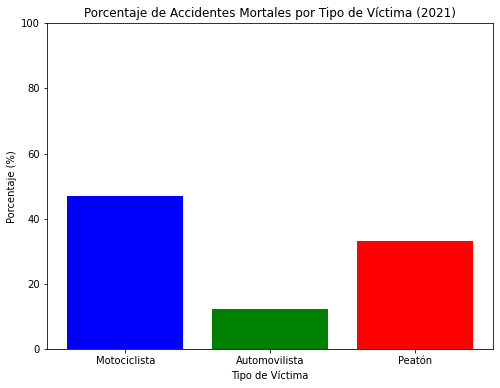

Porcentaje de Accidentes Mortales por Tipo de Víctima (2021):
Motociclista: 46.88%
Automovilista: 12.50%
Peatón: 33.33%


In [116]:
df_hechos_victimas['fecha_fallecimiento'] = pd.to_datetime(df_hechos_victimas['fecha_fallecimiento'])

# Filtrar los datos para el último año (2021).
filtro_ultimo_anio = (df_hechos_victimas['fecha_fallecimiento'].dt.year == 2021)
df_ultimo_anio = df_hechos_victimas[filtro_ultimo_anio]

# 2. Contar la cantidad de accidentes mortales de cada tipo de víctima.
accidentes_motociclista = df_ultimo_anio[df_ultimo_anio['victima'] == 'moto'].shape[0]
accidentes_automovilista = df_ultimo_anio[df_ultimo_anio['victima'] == 'auto'].shape[0]
accidentes_peaton = df_ultimo_anio[df_ultimo_anio['victima'] == 'peaton'].shape[0]

# Calcular el porcentaje de accidentes mortales para cada tipo de víctima.
total_accidentes = df_ultimo_anio.shape[0]
porcentaje_motociclista = (accidentes_motociclista / total_accidentes) * 100
porcentaje_automovilista = (accidentes_automovilista / total_accidentes) * 100
porcentaje_peaton = (accidentes_peaton / total_accidentes) * 100

# Graficar los porcentajes en un gráfico de barras.
tipos_de_victima = ['Motociclista', 'Automovilista', 'Peatón']
porcentajes = [porcentaje_motociclista, porcentaje_automovilista, porcentaje_peaton]

plt.figure(figsize=(8, 6))
plt.bar(tipos_de_victima, porcentajes, color=['blue', 'green', 'red'])
plt.title('Porcentaje de Accidentes Mortales por Tipo de Víctima (2021)')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)  
plt.show()

# Imprimir los porcentajes
print("Porcentaje de Accidentes Mortales por Tipo de Víctima (2021):")
print(f"Motociclista: {porcentaje_motociclista:.2f}%")
print(f"Automovilista: {porcentaje_automovilista:.2f}%")
print(f"Peatón: {porcentaje_peaton:.2f}%")


3 -Muestra la cantidad de incidentes para cada combinación de sexo y rol en 2021. Cada barra representa una combinación de sexo y rol, y los colores dentro de cada barra representan la distribución de incidentes por sexo. Gráfico de barras agrupadas

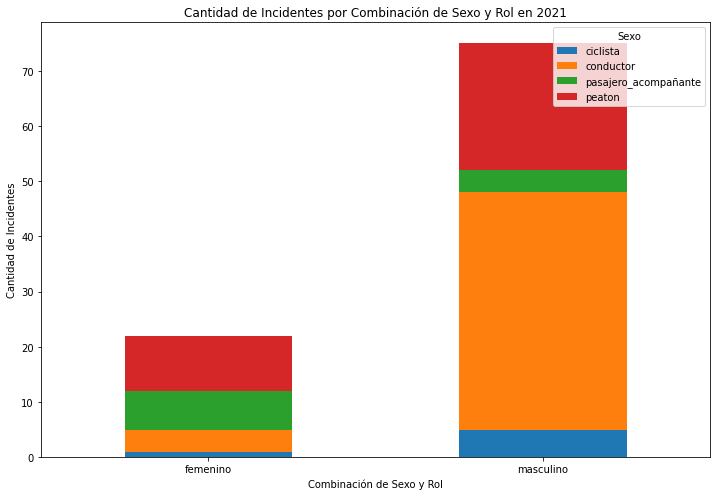

Porcentaje de Incidentes por Combinación de Sexo y Rol en 2021:
rol        ciclista  conductor  pasajero_acompañante     peaton
sexo                                                           
femenino   1.030928   4.123711              7.216495  10.309278
masculino  5.154639  44.329897              4.123711  23.711340


In [114]:
df_2021 = df_hechos_victimas[df_hechos_victimas['aaaa'] == 2021]

# Calcular el conteo de registros por combinación de sexo y rol
conteo_por_combinacion = df_2021.groupby(['sexo', 'rol']).size().unstack().fillna(0)

# Calcular los porcentajes por combinación de sexo y rol
porcentaje_por_combinacion = (conteo_por_combinacion / conteo_por_combinacion.sum().sum()) * 100

# Graficar los resultados
conteo_por_combinacion.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cantidad de Incidentes por Combinación de Sexo y Rol en 2021')
plt.xlabel('Combinación de Sexo y Rol')
plt.ylabel('Cantidad de Incidentes')
plt.xticks(rotation=0)
plt.legend(title='Sexo', loc='upper right')
plt.show()

# Imprimir los porcentajes por combinación de sexo y rol
print("Porcentaje de Incidentes por Combinación de Sexo y Rol en 2021:")
print(porcentaje_por_combinacion)



4- Muestra la cantidad de incidentes para cada combinación de sexo y acusado en 2021. Cada barra representa una combinación de sexo y acusado, y los colores dentro de cada barra representan la distribución de incidentes por sexo. Gráfico de barras agrupadas

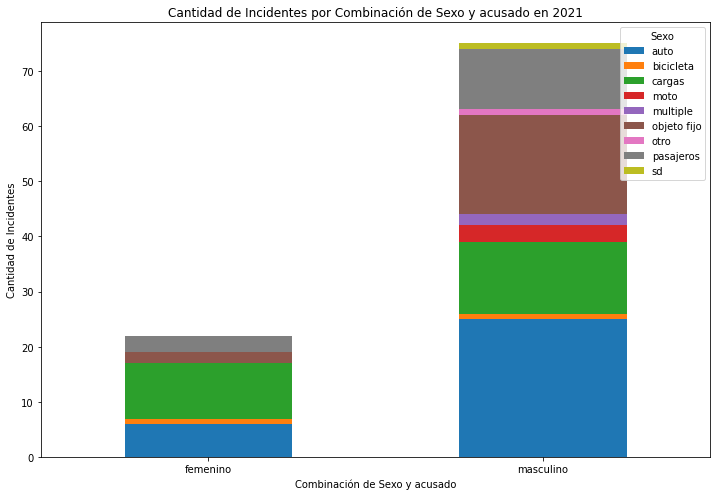

Porcentaje de Incidentes por Combinación de Sexo y acusado en 2021:
acusado         auto  bicicleta     cargas      moto  multiple  objeto fijo   
sexo                                                                          
femenino    6.185567   1.030928  10.309278  0.000000  0.000000     2.061856  \
masculino  25.773196   1.030928  13.402062  3.092784  2.061856    18.556701   

acusado        otro  pasajeros        sd  
sexo                                      
femenino   0.000000   3.092784  0.000000  
masculino  1.030928  11.340206  1.030928  


In [115]:
df_2021 = df_hechos_victimas[df_hechos_victimas['aaaa'] == 2021]

# Calcular el conteo de registros por combinación de sexo y rol
conteo_por_combinacion = df_2021.groupby(['sexo', 'acusado']).size().unstack().fillna(0)

# Calcular los porcentajes por combinación de sexo y rol
porcentaje_por_combinacion = (conteo_por_combinacion / conteo_por_combinacion.sum().sum()) * 100

# Graficar los resultados
conteo_por_combinacion.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cantidad de Incidentes por Combinación de Sexo y acusado en 2021')
plt.xlabel('Combinación de Sexo y acusado')
plt.ylabel('Cantidad de Incidentes')
plt.xticks(rotation=0)
plt.legend(title='Sexo', loc='upper right')
plt.show()

# Imprimir los porcentajes por combinación de sexo y rol
print("Porcentaje de Incidentes por Combinación de Sexo y acusado en 2021:")
print(porcentaje_por_combinacion)

5-- Se segmenta y agrupa las horas en rangos de "Mañana", "Tarde" y "Noche", y luego muestra la distribución de accidentes en esos rangos durante el 2021. 

C:\Users\rossa\AppData\Local\Temp\ipykernel_101424\2137291701.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['hora'] = pd.to_datetime(df_2021['hora'], format='%H:%M:%S')
C:\Users\rossa\AppData\Local\Temp\ipykernel_101424\2137291701.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021.loc[horas_manana, 'rango_horario'] = 'Mañana'


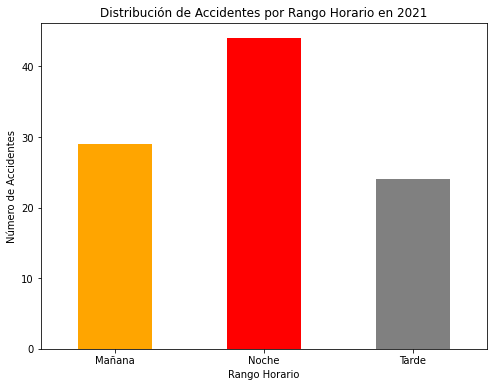

Porcentaje de Accidentes en la Mañana: 29.90%
Porcentaje de Accidentes en la Tarde: 24.74%
Porcentaje de Accidentes en la Noche: 45.36%


In [112]:
# Filtrar los datos con solo registros del año 2021
df_2021 = df_hechos_victimas[df_hechos_victimas['aaaa'] == 2021]

# Extraer la hora de la columna 'hora' y convertirla en un objeto datetime
df_2021['hora'] = pd.to_datetime(df_2021['hora'], format='%H:%M:%S')

# Definir los límites de los rangos horarios (mañana, tarde, noche)
horas_manana = (df_2021['hora'].dt.hour >= 6) & (df_2021['hora'].dt.hour < 12)
horas_tarde = (df_2021['hora'].dt.hour >= 12) & (df_2021['hora'].dt.hour < 18)
horas_noche = (df_2021['hora'].dt.hour >= 18) | (df_2021['hora'].dt.hour < 6)

# Crear una nueva columna 'rango_horario' basada en los límites definidos
df_2021.loc[horas_manana, 'rango_horario'] = 'Mañana'
df_2021.loc[horas_tarde, 'rango_horario'] = 'Tarde'
df_2021.loc[horas_noche, 'rango_horario'] = 'Noche'

# Calcular la distribución de accidentes por rango horario
distribucion_rango_horario = df_2021['rango_horario'].value_counts().sort_index()

# Calcular los porcentajes por rango horario
porcentaje_manana = (distribucion_rango_horario['Mañana'] / len(df_2021)) * 100
porcentaje_tarde = (distribucion_rango_horario['Tarde'] / len(df_2021)) * 100
porcentaje_noche = (distribucion_rango_horario['Noche'] / len(df_2021)) * 100

# Definir colores para cada rango horario
colores = ['orange', 'red', 'gray']

# Graficar la distribución por rango horario con colores personalizados
plt.figure(figsize=(8, 6))
distribucion_rango_horario.plot(kind='bar', color=colores)
plt.xlabel('Rango Horario')
plt.ylabel('Número de Accidentes')
plt.title('Distribución de Accidentes por Rango Horario en 2021')
plt.xticks(rotation=0)
plt.show()

# Imprimir los porcentajes por rango horario
print(f"Porcentaje de Accidentes en la Mañana: {porcentaje_manana:.2f}%")
print(f"Porcentaje de Accidentes en la Tarde: {porcentaje_tarde:.2f}%")
print(f"Porcentaje de Accidentes en la Noche: {porcentaje_noche:.2f}%")


In [119]:
rango_hora = {
    'rango_horario': distribucion_rango_horario.index,
    'numero_accidentes': distribucion_rango_horario.values
}

# Crea el DataFrame a partir de los resultados
rango_hora = pd.DataFrame(rango_hora)
rango_hora

,rango_horario,numero_accidentes
0,Mañana,29
1,Noche,44
2,Tarde,24


In [120]:
ruta_csv = r"C:\Users\rossa\Desktop\HENRY\PROYECTO INDIVIDUAL PB\Proyecto_siniestros_viales\rango_hora.csv"

rango_hora.to_csv(ruta_csv, index=False)

print("DataFrame guardado como archivo CSV en:", ruta_csv)

DataFrame guardado como archivo CSV en: C:\Users\rossa\Desktop\HENRY\PROYECTO INDIVIDUAL PB\Proyecto_siniestros_viales\rango_hora.csv


6 -  Se busca identificar visualmente valores atípicos (outliers) en las variables "edad" y "n_victimas", para lograr un mejor análisis exploratorio de datos y observaciones inusuales en el conjunto de datos. Gráfico de dispersión.

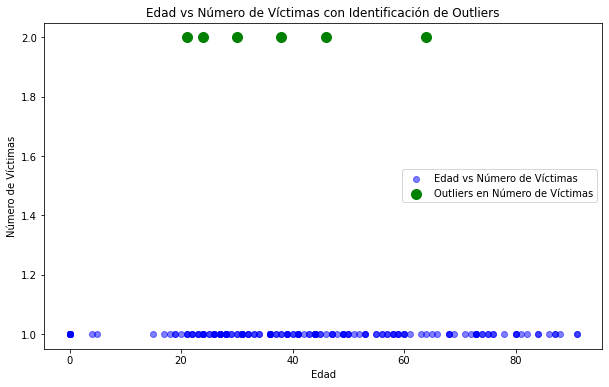

No hay outliers en Edad.
Outliers en Número de Víctimas:
           id  n_victimas                          lugar_del_hecho  comuna   
37  2020-0038           2  las heras general av. y diaz, cnel. av.      14  \
38  2020-0038           2  las heras general av. y diaz, cnel. av.      14   
63  2020-0063           2                 nueva york y alta gracia      11   
64  2020-0063           2                 nueva york y alta gracia      11   
77  2020-0077           2            san martin av. y punta arenas      15   
78  2020-0077           2            san martin av. y punta arenas      15   

      altura     participantes                  calle acusado tipo_de_calle   
37  sin dato         auto-auto  las heras general av.    auto       avenida  \
38  sin dato         auto-auto  las heras general av.    auto       avenida   
63  sin dato  peaton_moto-moto             nueva york    moto         calle   
64  sin dato  peaton_moto-moto             nueva york    moto         calle   
7

In [95]:
# Crear un scatter plot de "edad" vs "n_victimas"
plt.figure(figsize=(10, 6))
plt.scatter(df_hechos_victimas['edad'], df_hechos_victimas['n_victimas'], c='blue', alpha=0.5, label='Edad vs Número de Víctimas')

# Identificar y resaltar outliers en "edad" y "n_victimas"
Q1_edad = df_hechos_victimas['edad'].quantile(0.25)
Q3_edad = df_hechos_victimas['edad'].quantile(0.75)
IQR_edad = Q3_edad - Q1_edad
umbral_superior_edad = Q3_edad + 1.5 * IQR_edad
outliers_edad = df_hechos_victimas[df_hechos_victimas['edad'] > umbral_superior_edad]

Q1_n_victimas = df_hechos_victimas['n_victimas'].quantile(0.25)
Q3_n_victimas = df_hechos_victimas['n_victimas'].quantile(0.75)
IQR_n_victimas = Q3_n_victimas - Q1_n_victimas
umbral_superior_n_victimas = Q3_n_victimas + 1.5 * IQR_n_victimas
outliers_n_victimas = df_hechos_victimas[df_hechos_victimas['n_victimas'] > umbral_superior_n_victimas]

# Marcar los outliers en el gráfico
if not outliers_edad.empty:
    plt.scatter(outliers_edad['edad'], outliers_edad['n_victimas'], label='Outliers en Edad', color='red', marker='x', s=100)
if not outliers_n_victimas.empty:
    plt.scatter(outliers_n_victimas['edad'], outliers_n_victimas['n_victimas'], label='Outliers en Número de Víctimas', color='green', marker='o', s=100)

plt.title('Edad vs Número de Víctimas con Identificación de Outliers')
plt.xlabel('Edad')
plt.ylabel('Número de Víctimas')
plt.legend()
plt.show()

# Mostrar los datos de los outliers
if not outliers_edad.empty:
    print("Outliers en Edad:")
    print(outliers_edad)
else:
    print("No hay outliers en Edad.")

if not outliers_n_victimas.empty:
    print("Outliers en Número de Víctimas:")
    print(outliers_n_victimas)
else:
    print("No hay outliers en Número de Víctimas.")



7 - Se muestra la distribución de muertes a lo largo del tiempo, y  la fecha en la que hubo más muertes. Gráfico de barras.

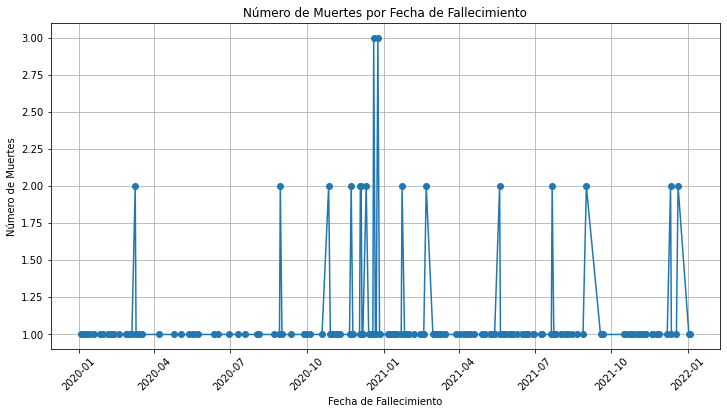

La fecha con el mayor número de muertes fue 2020-12-20 con 3 muertes.


In [96]:
df_hechos_victimas['fecha_fallecimiento'] = pd.to_datetime(df_hechos_victimas['fecha_fallecimiento'])

# Calcular el número de muertes por fecha de fallecimiento
muertes_por_fecha_fallecimiento = df_hechos_victimas['fecha_fallecimiento'].dt.date.value_counts().sort_index()

# Graficar el número de muertes por fecha de fallecimiento
plt.figure(figsize=(12, 6))
plt.plot(muertes_por_fecha_fallecimiento.index, muertes_por_fecha_fallecimiento.values, marker='o')
plt.title('Número de Muertes por Fecha de Fallecimiento')
plt.xlabel('Fecha de Fallecimiento')
plt.ylabel('Número de Muertes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Encontrar la fecha con el mayor número de muertes
fecha_fallecimiento_max_muertes = muertes_por_fecha_fallecimiento.idxmax()
max_muertes = muertes_por_fecha_fallecimiento.max()

print(f"La fecha con el mayor número de muertes fue {fecha_fallecimiento_max_muertes} con {max_muertes} muertes.")


8 -  Se visualiza las 5 comunas con mayor incidencia de accidentes durante el período especificado. Gráfico de barras

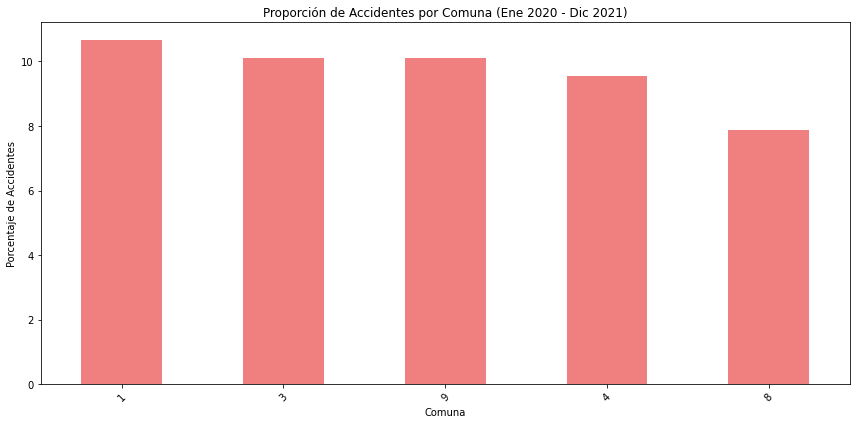

Comuna 1: 10.67%
Comuna 3: 10.11%
Comuna 9: 10.11%
Comuna 4: 9.55%
Comuna 8: 7.87%
Comuna 15: 6.74%
Comuna 7: 6.74%
Comuna 11: 5.62%
Comuna 13: 5.62%
Comuna 12: 5.62%
Comuna 2: 5.06%
Comuna 14: 5.06%
Comuna 5: 3.93%
Comuna 6: 3.93%
Comuna 10: 3.37%


In [109]:
# Convertir la columna 'fecha' a tipo datetime 
df_hechos_victimas['fecha'] = pd.to_datetime(df_hechos_victimas['fecha'])
# Filtrar los datos para el período deseado (Enero 2020 - Diciembre 2021)
filtro_fecha = (df_hechos_victimas['fecha'] >= '2020-01-01') & (df_hechos_victimas['fecha'] <= '2021-12-31')
df_periodo = df_hechos_victimas[filtro_fecha]

# Calcular la proporción de accidentes por comuna en relación al total
proporcion_comunas = (df_periodo['comuna'].value_counts() / len(df_periodo)) * 100

# Graficar la proporción de accidentes por comuna (top 5)
plt.figure(figsize=(12, 6))
proporcion_comunas.head(5).plot(kind='bar', color='lightcoral')
plt.title('Proporción de Accidentes por Comuna (Ene 2020 - Dic 2021)')
plt.xlabel('Comuna')
plt.ylabel('Porcentaje de Accidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calcular la proporción de accidentes por comuna en relación al total
proporcion_comunas = (df_periodo['comuna'].value_counts() / len(df_periodo)) * 100

# Imprimir el porcentaje por comuna
for comuna, porcentaje in proporcion_comunas.items():
    print(f'Comuna {comuna}: {porcentaje:.2f}%')

9 - Se realiza métrica para visualizar la diferencia de victimas mortales  entre el 2020 y 2021. Gráfico de barras

Total de muertes en 2020: 86
Total de muertes en 2021: 96
Porcentaje de muertes en 2020 respecto a 2021: 89.58333333333334%
Diferencia en porcentaje entre 2020 y 2021: 11.63%


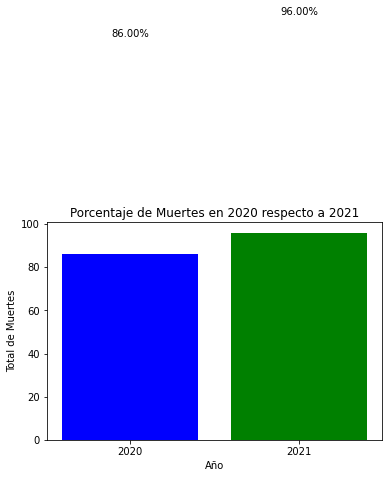

In [104]:

df_hechos_victimas_2020 = df_hechos_victimas[df_hechos_victimas['fecha_fallecimiento'].dt.year == 2020]
df_hechos_victimas_2021 = df_hechos_victimas[df_hechos_victimas['fecha_fallecimiento'].dt.year == 2021]

# Calculamos el total de muertes en 2020 y 2021
total_muertes_2020 = df_hechos_victimas_2020['n_victimas'].sum()
total_muertes_2021 = df_hechos_victimas_2021['n_victimas'].sum()

# Calculamos el porcentaje de muertes en 2020 respecto a 2021
porcentaje_muertes = (total_muertes_2020 / total_muertes_2021) * 100

print(f"Total de muertes en 2020: {total_muertes_2020}")
print(f"Total de muertes en 2021: {total_muertes_2021}")
print(f"Porcentaje de muertes en 2020 respecto a 2021: {porcentaje_muertes}%")

# Calcular la diferencia en porcentaje entre 2021 y 2020
diferencia_porcentaje = ((total_muertes_2021 - total_muertes_2020) / total_muertes_2020) * 100

print(f"Diferencia en porcentaje entre 2020 y 2021: {diferencia_porcentaje:.2f}%")

# se grafica la metrica
anios = ['2020', '2021']
total_muertes = [total_muertes_2020, total_muertes_2021]

# Crear la gráfica de barras
plt.bar(anios, total_muertes, color=['blue', 'green'])
plt.xlabel('Año')
plt.ylabel('Total de Muertes')
plt.title('Porcentaje de Muertes en 2020 respecto a 2021')

# Mostrar el porcentaje en la parte superior de las barras
for i in range(len(anios)):
    plt.text(anios[i], total_muertes[i] + 100, f"{total_muertes[i]:.2f}%", ha='center', va='bottom')

# Mostrar la gráfica
plt.show()

10 - Se realiza métrica para visualizar la diferencia de victimas en accidentes entre el 2020 y 2021.

In [107]:
df_hechos_victimas_2020 = df_hechos_victimas[df_hechos_victimas['fecha'].dt.year == 2020]
df_hechos_victimas_2021 = df_hechos_victimas[df_hechos_victimas['fecha'].dt.year == 2021]

# Calculamos el total de muertes en 2020 y 2021
total_victimas_2020 = df_hechos_victimas_2020['n_victimas'].sum()
total_victimas_2021 = df_hechos_victimas_2021['n_victimas'].sum()

# Calculamos el porcentaje de muertes en 2020 respecto a 2021
porcentaje_victimas = (total_victimas_2020 / total_victimas_2021) * 100

print(f"Total de victimas en 2020: {total_victimas_2020}")
print(f"Total de victimas en 2021: {total_victimas_2021}")
print(f"Porcentaje de victimas en 2020 respecto a 2021: {porcentaje_victimas}%")

# Calcular la diferencia en porcentaje entre 2021 y 2020
diferencia_porcentaje = ((total_victimas_2021 - total_victimas_2020) / total_victimas_2020) * 100

print(f"Diferencia en porcentaje entre 2020 y 2021: {diferencia_porcentaje:.2f}%")

Total de victimas en 2020: 87
Total de victimas en 2021: 97
Porcentaje de victimas en 2020 respecto a 2021: 89.69072164948454%
Diferencia en porcentaje entre 2020 y 2021: 11.49%
